# Задача 14
###### Используя данные о школьниках, выявить степень их алкогольной зависимости. В данных, взятых с UCI 'Students', содержится информация о 30 признаках для каждого школьника, включая социальные и гендерные, а также указана материальная обеспеченность и количество свободного времени. Выбрать на свой взгляд наиболее весомые признаки и предсказать степень употребления алкоголя по выходным или будним по шкале от 0 до 5.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

#### Загрузим датасет (https://www.kaggle.com/uciml/student-alcohol-consumption)

In [2]:
data = pd.read_csv("student-por.csv") 
data.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11


### Попробуем визуально найти попарные корреляции

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]), <a list of 16 Text yticklabel objects>)

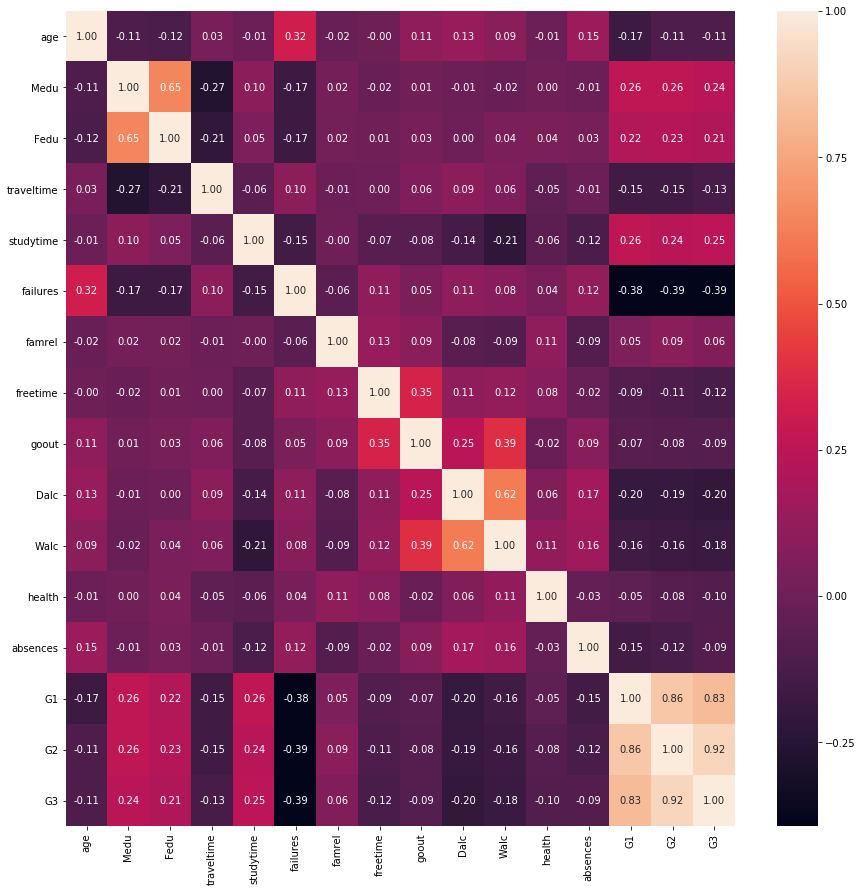

In [3]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)


In [4]:
d = data.copy()

#### Немного подправим сет: "оцифруем" текстовые значения, выкинем фичи, с которыми корреляция минимальна

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

d[[
    'school', 'sex', 'address', 'famsize',
    'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian'
]] = \
d[[
    'school', 'sex', 'address', 'famsize',
    'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian'
]].apply(le.fit_transform)


d.replace({'yes': 1, 'no': 0}, inplace=True)

In [25]:
x = d.drop(['Walc', 'Dalc'], axis=1)

#x.drop(['Medu', 'Fedu', 'traveltime', 'failures', 'absences'], axis=1, inplace=True)

w_y = d.Walc
d_y = d.Dalc

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, d_y, test_size=0.1, random_state=42)

## Обучение
#### Попробуем обучить две модели: RandomForestRegressor и LinearRegression

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10000)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
from sklearn.metrics import confusion_matrix, mean_squared_error

In [30]:
prediction_train_rf = rf.predict(x_train).round()
prediction_train_lr = lr.predict(x_train).round()

print(np.sqrt(mean_squared_error(prediction_train_rf, y_train)))
print(np.sqrt(mean_squared_error(prediction_train_lr, y_train)))

print(confusion_matrix(prediction_train_rf, y_train))
print(confusion_matrix(prediction_train_lr, y_train))

0.32319043116175417
0.8510670176273727
[[393   0   0   0   0]
 [ 18 100  11   0   0]
 [  0   0  29  15   0]
 [  0   0   0   1  17]
 [  0   0   0   0   0]]
[[  0   2   0   0   0   0]
 [  0 276  33   4   1   0]
 [  0 130  62  33  15  11]
 [  0   3   5   3   0   6]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]


In [31]:
prediction_test_rf = rf.predict(x_test).round()
prediction_test_lr = lr.predict(x_test).round()

print(np.sqrt(mean_squared_error(prediction_test_rf, y_test)))
print(np.sqrt(mean_squared_error(prediction_test_lr, y_test)))

print(confusion_matrix(prediction_test_rf, y_test))
print(confusion_matrix(prediction_test_lr, y_test))

0.8857851797221404
0.7942098153317112
[[27 17  3  1]
 [13  4  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]
[[33 13  3  1]
 [ 7  8  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]


# Вывод и графики
## Вывод
Из полученных средних ошибок видно, что RandomForest работает на учебной выборке лучше, но на тестовой показывает такой же результат, что и LinearRegression
## Графики
Добавим точкам белый шум, чтобы их было колличественно видно на графике

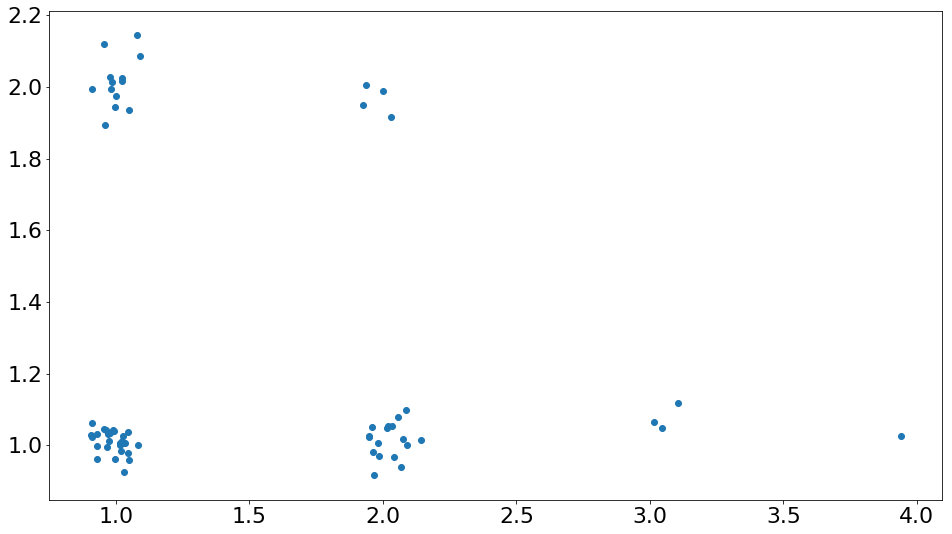

In [32]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(y_test + np.random.normal(scale=0.05, size=y_test.size),
           prediction_test_rf + np.random.normal(scale=0.05, size=y_test.size))

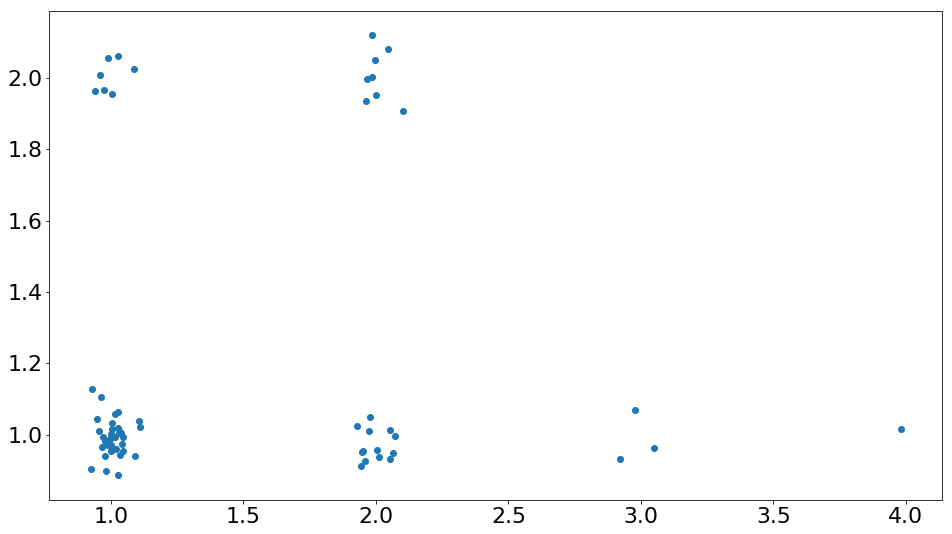

In [33]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(y_test + np.random.normal(scale=0.05, size=y_test.size),
           prediction_test_lr + np.random.normal(scale=0.05, size=y_test.size))